# HEAD

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.optimize import curve_fit
import os
import warnings
import pandas as pd
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
T = np.arange(0,1,0.01)

loadfiles = np.load('D:\\GoogleDrive\\retina\\Chou\'s data\\20210331\\Analyzed_data\\fitNGD2LASpara.npz', allow_pickle=True)
for k in loadfiles.files:
    vars()[k] = loadfiles[k][()]
Ppara_dict = dict.fromkeys(para_dict.keys())
Npara_dict = dict.fromkeys(para_dict.keys())
for k in para_dict.keys():
    Ppara_dict[k] = para_dict[k][pcn]
    Npara_dict[k] = para_dict[k][ncn]

for date in ['0413', '0420', '0504','0506']:
    loadfiles = np.load('D:\\GoogleDrive\\retina\\Chou\'s data\\2021'+date+'\\Analyzed_data\\fitNGD2LASpara.npz', allow_pickle=True)
    for k in loadfiles.files:
        vars()['new_'+k] = loadfiles[k][()]
    for k in para_dict.keys():
        if len(new_pcn) != 0: Ppara_dict[k] = np.append(Ppara_dict[k], new_para_dict[k][new_pcn])
        if len(new_ncn) != 0: Npara_dict[k] = np.append(Npara_dict[k], new_para_dict[k][new_ncn])

NPD = pd.DataFrame(Npara_dict)
PPD = pd.DataFrame(Ppara_dict)

para_dict = Ppara_dict

In [3]:
def ParaTrans(ASparadict, mag):     # because of overfitting, I assume alpha = mag*beta
    for k in ASparadict.keys():
        globals()[k] = ASparadict[k]
    global beta, alpha, g, l, Amp 
    
    beta = epsilon*2/(1+mag)
    alpha = epsilon*2*mag/(1+mag)
    g = omegastar**2 + (alpha-beta)**2 /4
    l = ((2*omegastar*np.tan(deltastar)*(-beta+gamma)+(alpha-beta)*(beta-gamma)+2*g)/
                (g*(-alpha-beta+2*gamma-2*omegastar*np.tan(deltastar))))
    Amp = Dmp*(g+alpha*beta-alpha*gamma-beta*gamma+gamma**2)/(-beta+gamma+g*l)
    DiffParadict = {'alpha':[], 'beta':[], 'gamma':[], 'g':[], 'l':[], 'tau_y':[], 'Amp':[], 'error':[]}
    for k in DiffParadict.keys():
        DiffParadict[k] = globals()[k]
    return DiffParadict

In [4]:
para_dict = {**para_dict, **ParaTrans(para_dict, 1)}

# Diff. Parameters

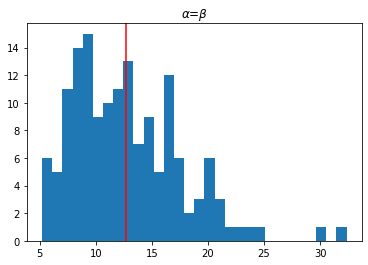

In [5]:
data = para_dict['alpha']
plt.title(r'$\alpha$=$\beta$')
plt.hist(data,30)
plt.axvline(np.mean(data), color = 'r')

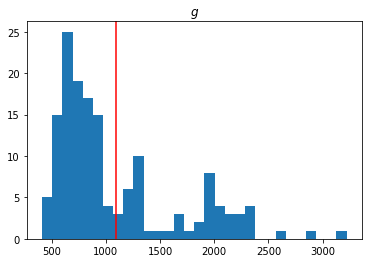

In [6]:
data = para_dict['g']
plt.title(r'$g$')
plt.hist(data,30)
plt.axvline(np.mean(data), color = 'r')

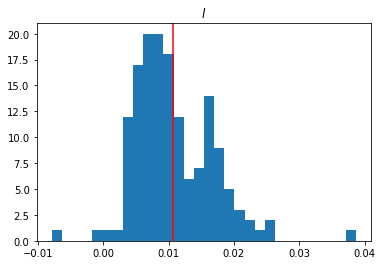

In [7]:
data = para_dict['l']
plt.title(r'$l"$')
plt.hist(data,30)
plt.axvline(np.mean(data), color = 'r')

0.03902309890785802

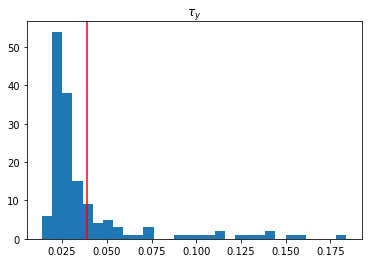

In [8]:
data = para_dict['tau_y']
plt.title(r'$\tau_y$')
plt.hist(data,30)
plt.axvline(np.mean(data), color = 'r')
np.mean(data)

55.28120494147859

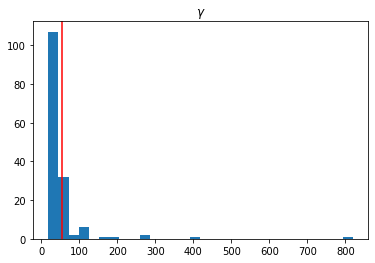

In [9]:
data = para_dict['gamma']
plt.title(r'$\gamma$')
plt.hist(data,30)
plt.axvline(np.mean(data), color = 'r')
np.mean(data)

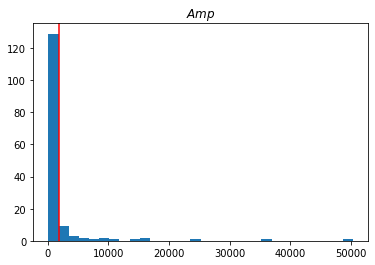

In [10]:
data = para_dict['Amp']
plt.title(r'$Amp$')
plt.hist(data,30)
plt.axvline(np.mean(data), color = 'r')

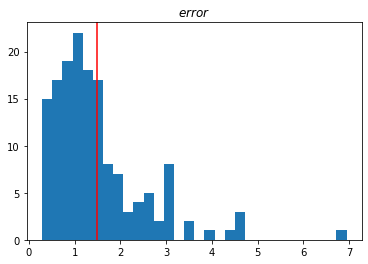

In [11]:
data = para_dict['error']
plt.title(r'$error$')
plt.hist(data,30)
plt.axvline(np.mean(data), color = 'r')

Text(0, 0.5, '$g$')

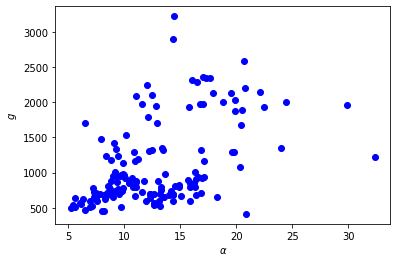

In [12]:
plt.scatter(para_dict['alpha'], para_dict['g'], c ='b')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$g$')

Text(0, 0.5, '$\\gamma$')

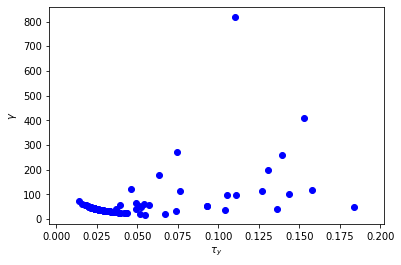

In [13]:
plt.scatter(para_dict['tau_y'], para_dict['gamma'], c ='b')
plt.xlabel(r'$\tau_y$')
plt.ylabel(r'$\gamma$')

Text(0, 0.5, '$g$')

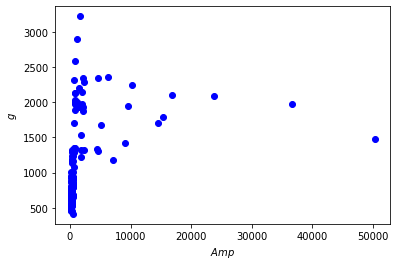

In [14]:
plt.scatter(para_dict['Amp'], para_dict['g'], c ='b')
plt.xlabel(r'$Amp$')
plt.ylabel(r'$g$')

Text(0, 0.5, '$\\alpha$')

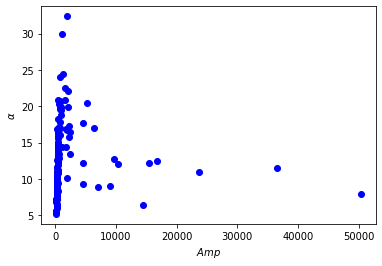

In [15]:
plt.scatter(para_dict['Amp'], para_dict['alpha'], c ='b')
plt.xlabel(r'$Amp$')
plt.ylabel(r'$\alpha$')

# def ll(x, a, b): return x*a+b
# popt, _ = curve_fit(ll, para_dict['Amp'], para_dict['alpha'])

# lims = [0, np.max(para_dict['Amp'])]
# plt.plot(lims, ll(np.array(lims), *popt), 'k-', alpha=0.75, zorder=0)

0.028799427893591703

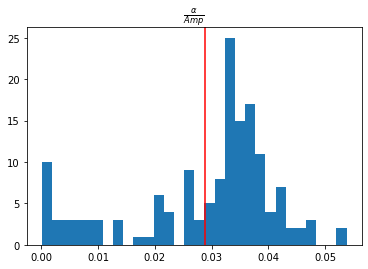

In [16]:
data = para_dict['alpha']/para_dict['Amp']
plt.title(r'$\frac{\alpha}{Amp}$')
plt.hist(data,30)
plt.axvline(np.mean(data), color = 'r')
np.mean(data)

# AS parameter

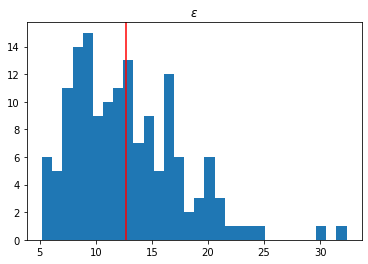

In [17]:
data = para_dict['epsilon']
plt.title(r'$\epsilon$')
plt.hist(data,30)
plt.axvline(np.mean(data), color = 'r')

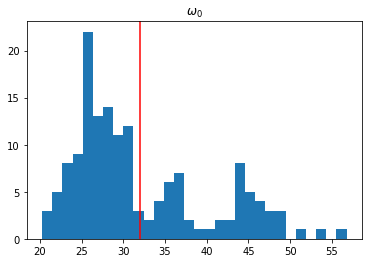

In [18]:
data = para_dict['omegastar']
plt.title(r'$\omega_0$')
plt.hist(data,30)
plt.axvline(np.mean(data), color = 'r')

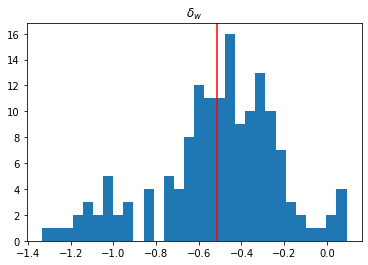

In [19]:
data = para_dict['deltastar']
plt.title(r'$\delta_w$')
plt.hist(data,30)
plt.axvline(np.mean(data), color = 'r')

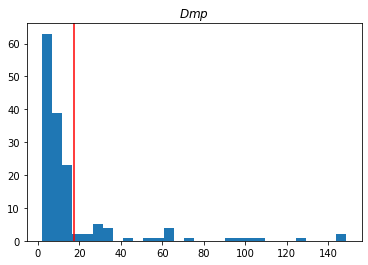

In [20]:
data = para_dict['Dmp']
plt.title(r'$Dmp$')
plt.hist(data,30)
plt.axvline(np.mean(data), color = 'r')

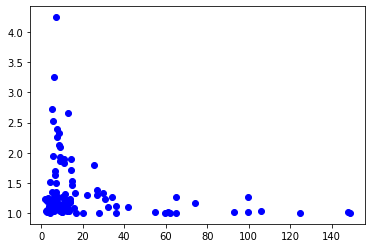

In [21]:
plt.scatter(para_dict['Dmp'], 1/np.cos(para_dict['deltastar']), c ='b')
# plt.xlabel(r'$Amp$')
# plt.ylabel(r'$\alpha$')

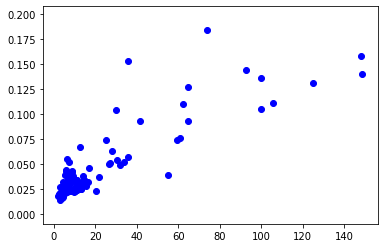

In [40]:
plt.scatter(para_dict['Dmp'], (para_dict['tau_y']), c ='b')
# plt.xlabel(r'$Amp$')
# plt.ylabel(r'$\alpha$')

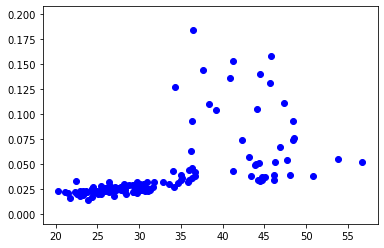

In [22]:
plt.scatter(para_dict['omegastar'], para_dict['tau_y'], c ='b')
# plt.xlabel(r'$Amp$')
# plt.ylabel(r'$\alpha$')

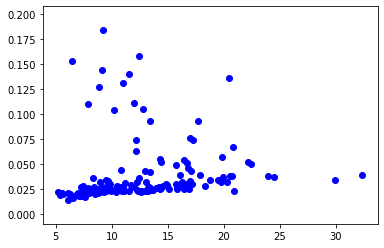

In [36]:
plt.scatter(para_dict['epsilon'], para_dict['tau_y'], c ='b')
# plt.xlabel(r'$Amp$')
# plt.ylabel(r'$\alpha$')

# filter by ...

In [23]:
Index2 = np.squeeze(np.where(para_dict['tau_y']<0.045))
Index = Index2

# Index = np.intersect1d(Index1, Index2, Index3)

Text(0, 0.5, '$\\gamma$')

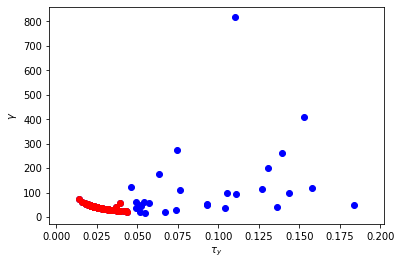

In [24]:
plt.scatter(para_dict['tau_y'], para_dict['gamma'], c ='b')
plt.scatter(para_dict['tau_y'][Index], para_dict['gamma'][Index], c ='r')
plt.xlabel(r'$\tau_y$')
plt.ylabel(r'$\gamma$')

Text(0, 0.5, '$g$')

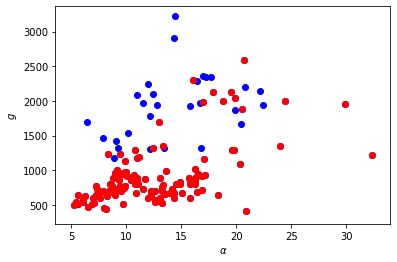

In [25]:
plt.scatter(para_dict['alpha'], para_dict['g'], c ='b')
plt.scatter(para_dict['alpha'][Index], para_dict['g'][Index], c ='r')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$g$')

Text(0, 0.5, '$g$')

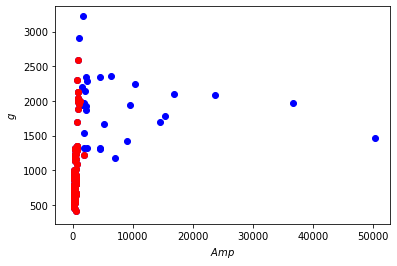

In [26]:
plt.scatter(para_dict['Amp'], para_dict['g'], c ='b')
plt.scatter(para_dict['Amp'][Index], para_dict['g'][Index], c ='r')
plt.xlabel(r'$Amp$')
plt.ylabel(r'$g$')

Text(0, 0.5, '$\\alpha$')

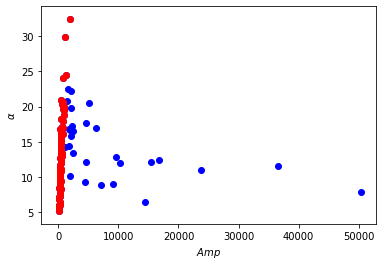

In [27]:
plt.scatter(para_dict['Amp'], para_dict['alpha'], c ='b')
plt.scatter(para_dict['Amp'][Index], para_dict['alpha'][Index], c ='r')
plt.xlabel(r'$Amp$')
plt.ylabel(r'$\alpha$')

# def ll(x, a, b): return x*a+b
# popt, _ = curve_fit(ll, para_dict['Amp'], para_dict['alpha'])

# lims = [0, np.max(para_dict['Amp'])]
# plt.plot(lims, ll(np.array(lims), *popt), 'k-', alpha=0.75, zorder=0)

# plot TK 

In [28]:
def NGD2L_TK_AS(T, epsilon, gamma, omegastar, deltastar, tau_y, Dmp):
    dt = np.mean(np.diff(T))
    dt = dt/50
    T = np.arange(0, T[-1]+dt, dt)
    x = T/tau_y /tau_y *np.exp(-T/tau_y)*dt
    
    Kw = -Dmp*( 1/np.cos(deltastar)*np.exp(-epsilon*T)*np.cos(T*omegastar+deltastar) -np.exp(-gamma*T) )
    w = np.convolve(x, Kw, 'full')[:len(T):50]*dt
    return w/(dt)


def NGD2L_TK(T, alpha, beta, gamma, g, l, tau_y, Amp):
    dt = np.mean(np.diff(T))
    dt = dt/50
    T = np.arange(0, T[-1]+dt, dt)
    x = T/tau_y /tau_y *np.exp(-T/tau_y)*dt
    
    y=np.zeros_like(x)
    z=np.zeros_like(x)
    w=np.zeros_like(x)
    for j in range(len(x)-1):
        dy=dt*(-alpha*y[j] + x[j]-z[j] )
        dz=dt*(-beta*z[j]  + g*y[j] )
        dw=dt*(-gamma*w[j] + y[j]-l*z[j] )
        y[j+1]=y[j]+dy
        z[j+1]=z[j]+dz
        w[j+1]=w[j]+dw

    return -Amp*w[::50]/(dt)

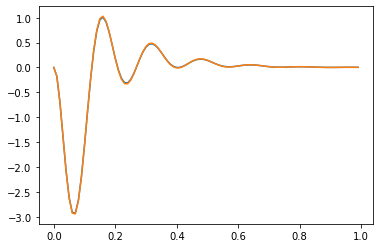

In [49]:
I = 30
parameters = PPD.loc[0][:-1]
plt.plot(T, NGD2L_TK_AS(T, *PPD.loc[I][:-1]))

parameters = pd.DataFrame(ParaTrans(para_dict, 1)).loc[I][:-1]
plt.plot(T, NGD2L_TK(T, *parameters))

In [50]:
PPD.loc[I]

epsilon        7.908474
gamma        818.951531
omegastar     38.352960
deltastar      0.088617
tau_y          0.110215
Dmp           62.309473
error          2.732078
Name: 30, dtype: float64

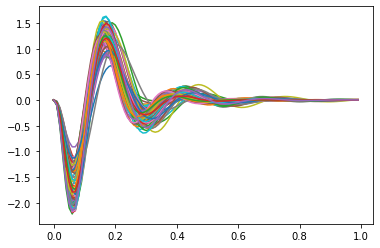

In [31]:
Index = np.squeeze(np.where(para_dict['omegastar']<30))
for I in Index:
    parameters = PPD.loc[0][:-1]
    plt.plot(T, NGD2L_TK_AS(T, *PPD.loc[I][:-1]))

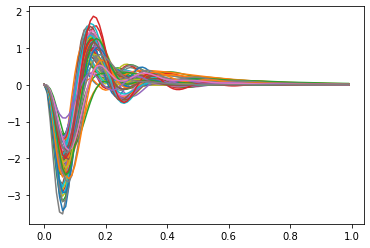

In [32]:
Index = np.squeeze(np.where(para_dict['omegastar']>30))
for I in Index:
    parameters = PPD.loc[0][:-1]
    plt.plot(T, NGD2L_TK_AS(T, *PPD.loc[I][:-1]))